In [115]:
using PyPlot

In [223]:
function simulate()
    N = 500
    p = 0.1
    g = 1.5
    alpha = 1.0
    nsecs = 1440
    dt = 0.1
    learn_every = 2#2.0
    pi = 3.1415
    scale = 1.0/sqrt(p*N)

    M = zeros(Float64, N, N);

    for i in 1:N
        for j in 1:N
            if rand() < p           
                M[i, j] = randn() * g * scale
            end
        end
    end

    nRec2Out = N
    wo = zeros(Float64, nRec2Out)
    dw = zeros(Float64, nRec2Out)
    wf = 2.0*(rand(N)-0.5);

    simtime = 0:dt:nsecs
    simtime_len = length(simtime)

    amp = 1.3
    freq = 1.0/60
    fts = (amp/1.0).*sin(1.0*pi*freq*simtime) +(amp/2.0).*sin(2.0*pi*freq*simtime) +(amp/6.0).*sin(3.0*pi*freq*simtime) + (amp/3.0).*sin(4.0*pi*freq*simtime)
    fts = fts /1.5;

    plot(fts)

    x0 = 0.5*randn(N)
    z0 = 0.5*randn()

    x = x0
    r = tanh(x)
    z = z0

    P = (1.0/alpha).* eye(Float64, nRec2Out);

    zlist = []
    for (i, (t, ft)) in enumerate(zip(simtime, fts))
        x = (1.0 - dt) .* x + M * r .* dt + wf .* (z * dt)
        r = tanh(x)
        z = transpose(wo) * r
        if (i+1) % learn_every == 0
            k = P * r
            rPr = transpose(r) * k
            c = 1.0 ./ (1.0 + rPr)
            P = P .- c .* (k * transpose(k))
            e = z - ft
            dw = -(transpose(c) * e) .* k
            wo = wo + dw
        end
        push!(zlist, z)    
    end
    return zlist
end

simulate (generic function with 1 method)

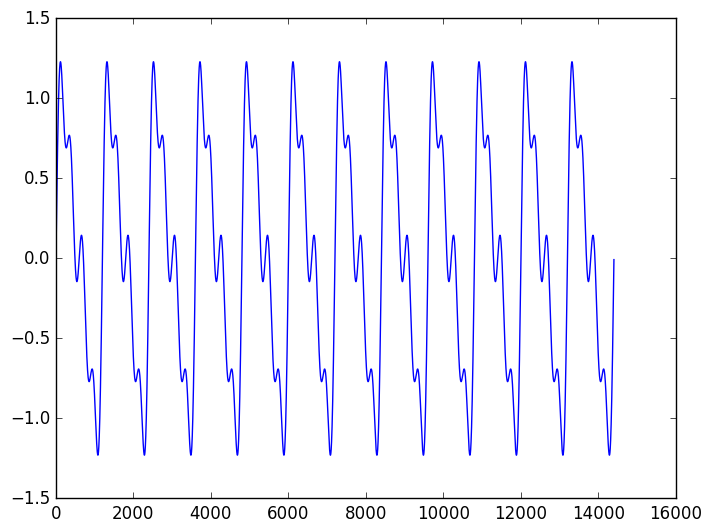

14401-element Array{Any,1}:
 [0.0]       
 [0.0]       
 [0.0]       
 [0.0394126] 
 [0.0473943] 
 [0.0744978] 
 [0.0831148] 
 [0.10824]   
 [0.117232]  
 [0.142753]  
 [0.152401]  
 [0.177345]  
 [0.18737]   
 ⋮           
 [-0.204026] 
 [-0.187314] 
 [-0.170411] 
 [-0.153413] 
 [-0.136191] 
 [-0.118852] 
 [-0.101262] 
 [-0.0835346]
 [-0.0655408]
 [-0.0473925]
 [-0.028982] 
 [-0.010407] 

In [224]:
simulate()